In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns


In [9]:
print(os.listdir('/content/database.sqlite'))

NotADirectoryError: ignored

In [3]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df.loc[:, nunique[(nunique > 1) & (nunique < 50)].index]  # Correctly filter columns
    nRow, nCol = df.shape
    columnNames = list(df.columns)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow  # Use integer division
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [10]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    numeric_cols = df.select_dtypes(include=[np.number])  # Select only numeric columns
    if numeric_cols.shape[1] < 2:
        print(f'No correlation plots shown: The number of numeric columns ({numeric_cols.shape[1]}) is less than 2')
        return
    corr = numeric_cols.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [11]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])
    df = df.dropna(axis='columns', how='all')
    df = df.loc[:, df.nunique() > 1]
    columnNames = list(df.columns)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center',
                          va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [12]:
def plotBoxPlot(df):
    df = df.select_dtypes(include=[np.number])
    df = df.dropna(axis='columns', how='all')
    df = df.loc[:, df.nunique() > 1]
    plt.figure(figsize=(10, 6))
    df.boxplot(vert=False)
    plt.title('Box Plot')
    plt.show()

In [13]:
def plotPairPlot(df):
    df = df.select_dtypes(include=[np.number])
    df = df.dropna(axis='columns', how='all')
    df = df.loc[:, df.nunique() > 1]
    sns.set(style="ticks")
    sns.pairplot(df, diag_kind='kde', markers='o')
    plt.suptitle('Pair Plot (Scatterplot Matrix)')
    plt.show()

In [14]:
nRowsRead = 1000
# Ensure the file path is correct
df1 = pd.read_csv('/content/Tweets.csv', delimiter=',', nrows=nRowsRead)
df1.dataframeName = 'Tweets.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 15 columns


In [15]:
df1.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


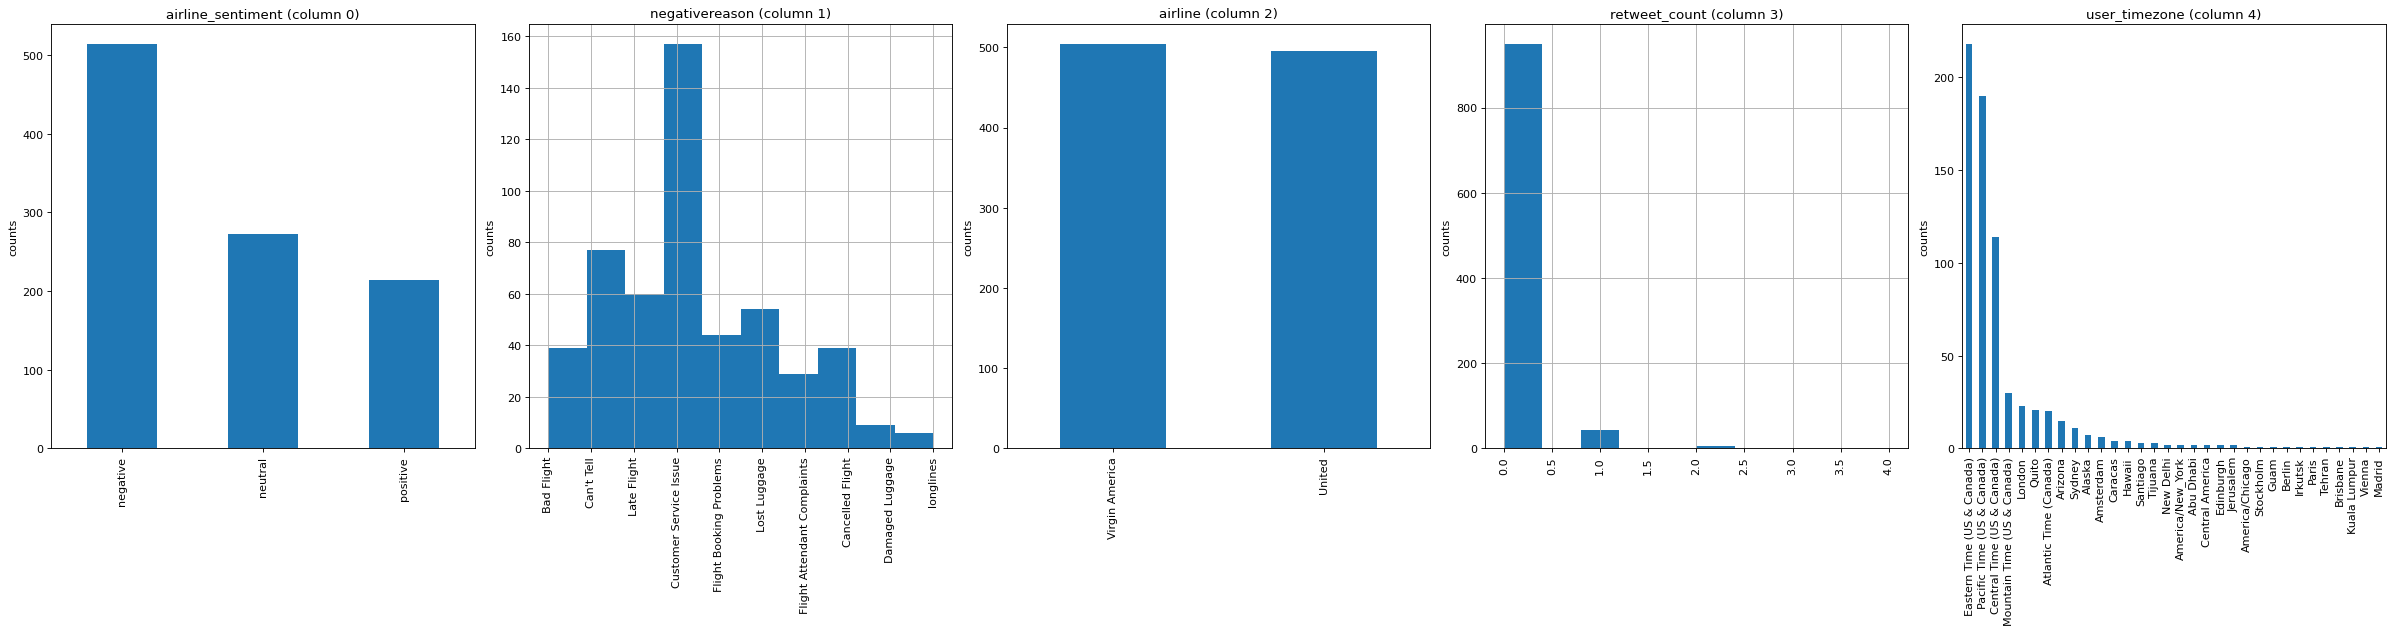

In [16]:
plotPerColumnDistribution(df1, 10, 5)

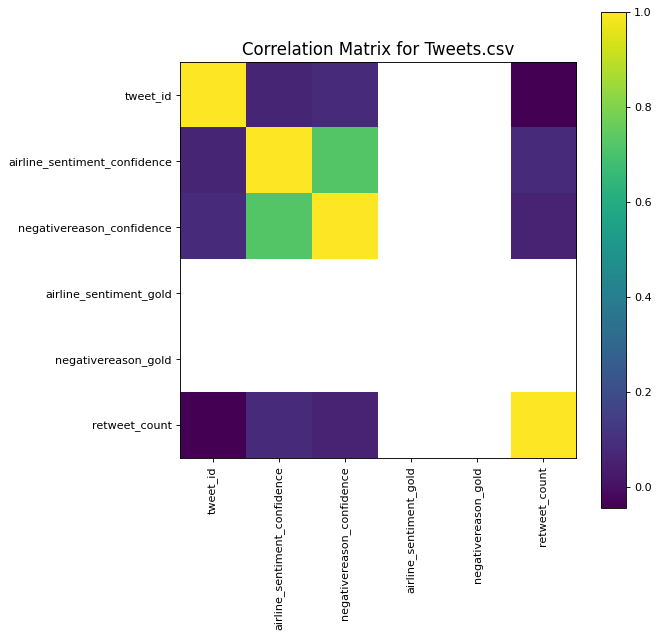

In [17]:
plotCorrelationMatrix(df1, 8)

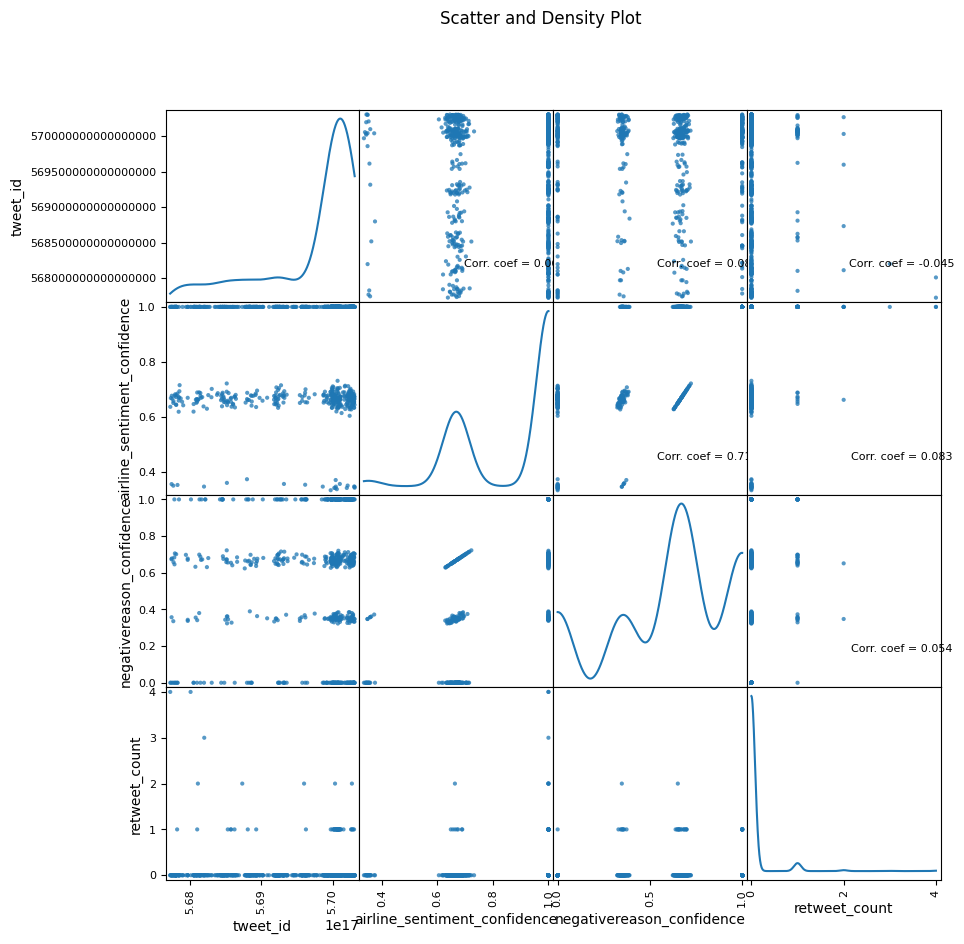

In [18]:
plotScatterMatrix(df1, 10, 8)

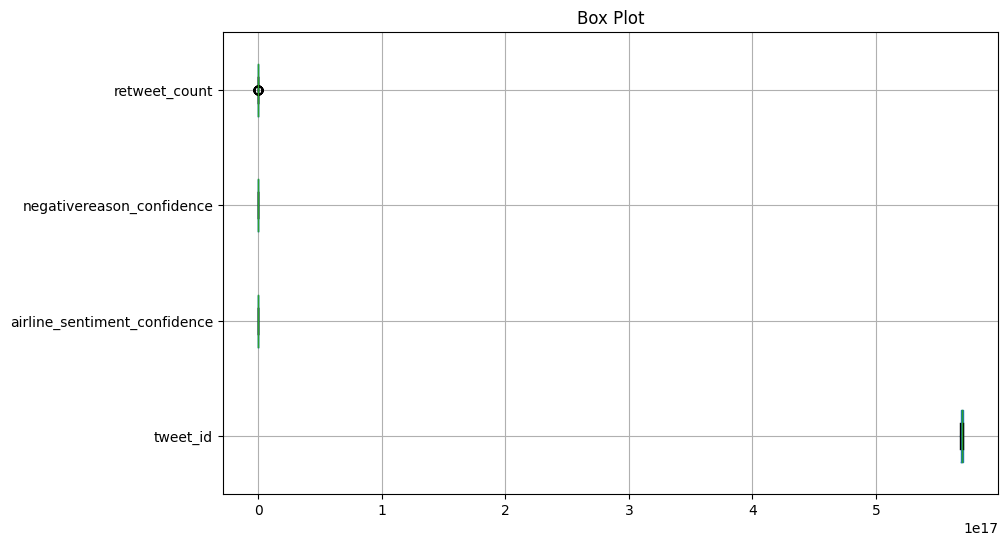

In [19]:
plotBoxPlot(df1)

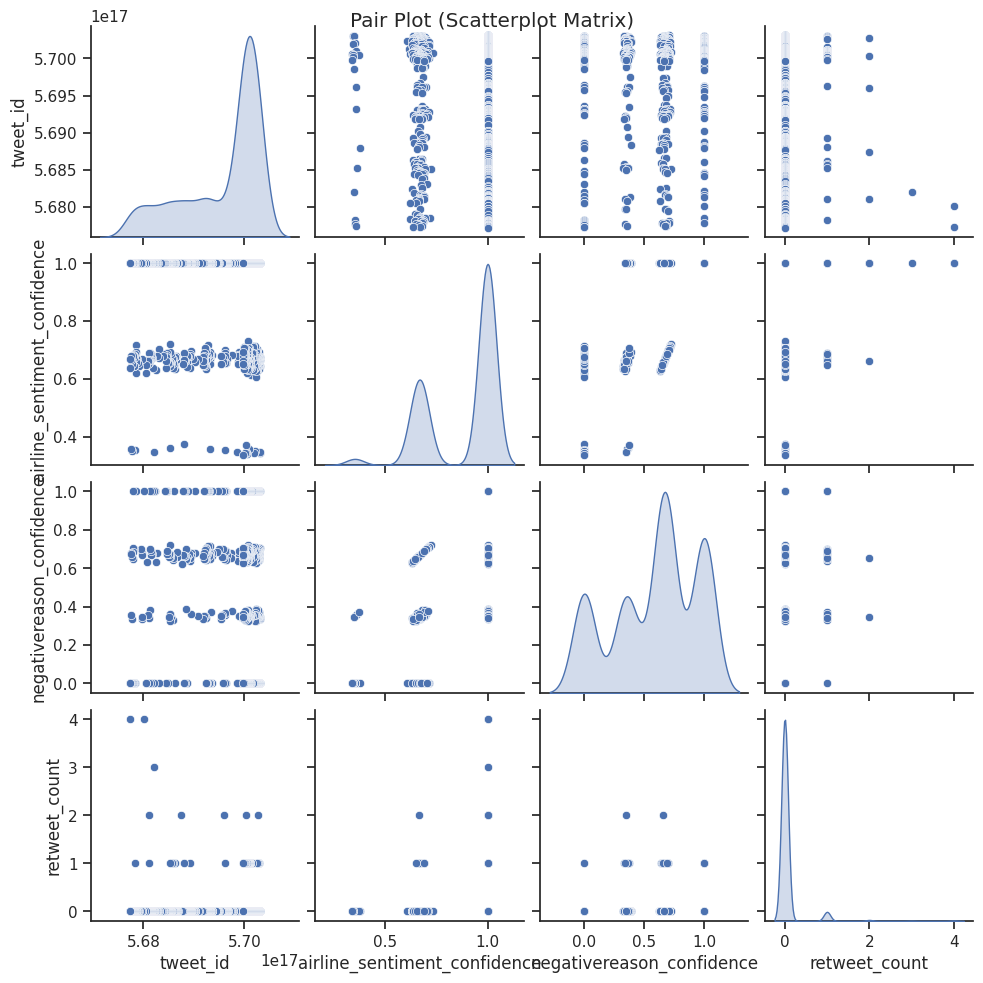

In [20]:
plotPairPlot(df1)

Based on the analysis of the provided dataset, it is observed that the dataset contains 1000 rows and 15 columns. The dataset primarily includes airline-related sentiment information, confidence scores, and user details. The pair plot suggests potential correlations between certain numeric attributes. Further analysis and feature engineering may be required to uncover insights and patterns related to airline sentiment.